In [74]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [129]:
from sklearn.datasets import make_moons

n_dotes = 10000

x, y = make_moons(n_dotes, noise=0.01, random_state=52)

In [130]:
import pandas as pd

circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:, 1],
                        "label": y
})

circles.head(100)

,x1,x2,label
0,1.304756,-0.470206,1
1,0.046087,0.232347,1
2,0.097670,0.993452,0
3,1.527388,-0.348408,1
4,0.982768,-0.507016,1
...,...,...,...
95,0.431918,-0.327536,1
96,-1.006039,0.112413,0
97,0.052850,0.219128,1
98,-0.795230,0.622831,0


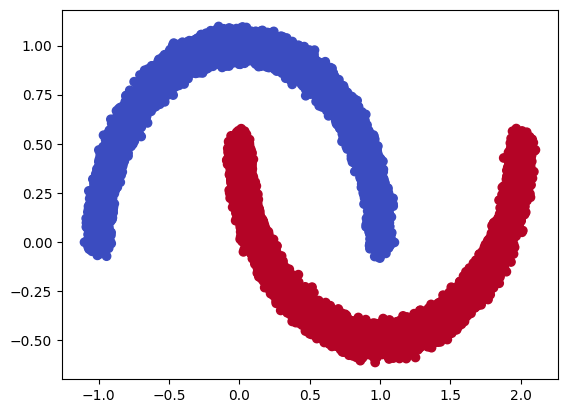

In [119]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.coolwarm)

In [120]:
circles.label.value_counts()

label
0    50000
1    50000
Name: count, dtype: int64

In [106]:
x.shape, y.shape

((10000, 2), (10000,))

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [132]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_test = torch.tensor(x_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

In [133]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [134]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

model = MoonModel().to(device)
model

MoonModel(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [135]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [137]:
from helper_functions import accuracy_fn


torch.manual_seed(52)
epochs = 10000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logit = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))

    loss = loss_fn(y_logit, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logit = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logit))
        test_loss = loss_fn(test_logit, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
        if epoch % 500 == 0 or epoch == epochs - 1:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 1000 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 1500 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 2000 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 2500 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 3000 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 3500 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 4000 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 4500 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 5000 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 

In [127]:
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(x_test)))
y_preds[:10], y[:10]

(tensor([[0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.]], device='cuda:0'),
 array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1]))

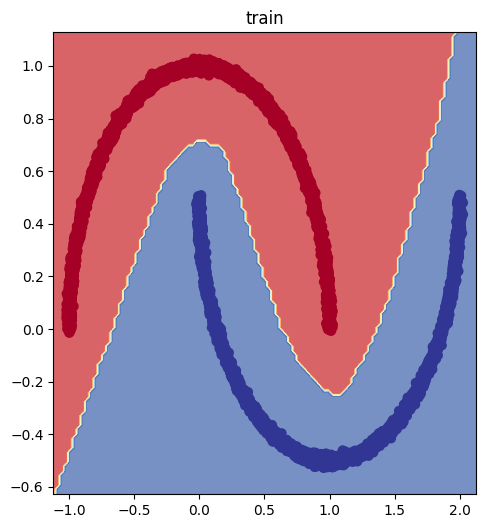

In [138]:
from helper_functions import plot_decision_boundary


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model, x_train, y_train)